In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import statsmodels.formula.api as smf

## the deliverable of first part of this notebook is a clean dataset on census tracts: ** df_census**
## uploaded on  https://github.com/picniclin/NYC_yl5240/blob/master/data/civic_census.csv

## Data source is from Geolytics: Neighborhood Change Database (NACD) (http://demographics.geolytics.com/ncdb2010/default.aspx)
the dataset geolytics_nyc_census_1990_2010.csv has been uploaded on:
https://github.com/picniclin/NYC_yl5240/blob/master/data/geolytics_nyc_census_1990_2010.csv


In [2]:
df = pd.read_csv('geolytics_nyc_census_1990_2010.csv')

In [3]:
df.shape

(2168, 111)

In [4]:
# list(df.columns)

In [5]:
cols = df.columns.str.replace('TRCTPOP', 'pop')\
            .str.replace('MDFAMY','median_fam_inc_')\
            .str.replace('FAVINC', 'ave_fam_inc_')\
            .str.replace('MDHHY', 'median_hh_inc_')\
            .str.replace('AVHHIN', 'ave_hh_inc_')\
            .str.replace('FALTY', 'fam_inc_')\
            .str.replace('FALT', 'fam_inc_')\
            .str.replace('MXB', 'max_')\
            .str.replace('FAY0', 'fam_inc_')\
            .str.replace('fam_inc_M', 'fam_inc_max_')\
            .str.replace('THY0', 'hh_inc_' )\
            .str.replace('hh_inc_M', 'hh_inc_max_')\
            .str.replace('MDVALHS','median_house_value_')\
            .str.replace('MDGRENT', 'median_rent_' )\
            .str.replace('1A', '1')\
            .str.replace('9A', '9')\
            .str.replace('RNTOCC', 'rent_units_')

df.columns = cols

df.rename(columns = {'AREAKEY' : 'census_tract','INTPTLAT':'lat', 'INTPTLON':'lon'}, 
          inplace = True)

In [6]:
df.head()

,census_tract,lat,lon,ZCTA5,pop9,ave_fam_inc_9,median_fam_inc_9,fam_inc_59,fam_inc_109,fam_inc_139,...,hh_inc_1251,hh_inc_1501,hh_inc_2001,hh_inc_max_201,median_hh_inc_1,median_house_value_1,median_rent_1,rent_units_9,rent_units_0,rent_units_1
0,36005000100,40.793492,-73.883532,11370.0,14303,0.00000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36005000200,40.804573,-73.856859,10473.0,2907,45267.28710,38711,31,29,29,...,203,48,68,11,59826,392500,1273,384,421,635
2,36005000400,40.808915,-73.850488,10473.0,2260,43694.20068,40484,15,19,24,...,97,161,96,73,71968,393700,1330,214,486,615
3,36005001600,40.818848,-73.858076,10473.0,5254,30042.84776,24732,61,142,53,...,20,38,20,0,30355,378100,823,1462,1517,1617
4,36005001900,40.800999,-73.909373,10454.0,1575,23377.47813,24823,76,50,0,...,19,21,0,0,25093,0,870,357,336,505


In [7]:
df.shape

(2168, 111)

In [8]:
df1 = pd.concat([df.iloc[:,:5], 
                 df.loc[:,df.columns[(df.columns.str.startswith('ava_'))|\
                                     (df.columns.str.startswith('median_'))|\
                                     (df.columns.str.startswith('rent_'))]]], 
                axis = 1)
df1.head()

,census_tract,lat,lon,ZCTA5,pop9,median_fam_inc_9,median_hh_inc_9,median_house_value_9,median_rent_9,median_fam_inc_0,median_hh_inc_0,median_house_value_0,median_rent_0,median_fam_inc_1,median_hh_inc_1,median_house_value_1,median_rent_1,rent_units_9,rent_units_0,rent_units_1
0,36005000100,40.793492,-73.883532,11370.0,14303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,36005000200,40.804573,-73.856859,10473.0,2907,38711,31632,136500,742,50817,42539,147500,730,58368,59826,392500,1273,384,421,635
2,36005000400,40.808915,-73.850488,10473.0,2260,40484,36506,163234,535,41019,39111,157610,643,73148,71968,393700,1330,214,486,615
3,36005001600,40.818848,-73.858076,10473.0,5254,24732,22739,156800,466,30104,24552,177000,558,33555,30355,378100,823,1462,1517,1617
4,36005001900,40.800999,-73.909373,10454.0,1575,24823,11215,48868,422,23671,22772,145960,461,25489,25093,0,870,357,336,505


In [9]:
df1.to_csv('nyc_1990_2010_census_median.csv')

## NYC has 2168 census tracts in 2010 census.

# 1. Create table for analysis

## 1.1 income and rent 

## Since there is no household income in 1990, we choose family income data as income data

In [10]:
## delete the observation, i.e. census tract, with 0 median rent or 0 median families income
df2 = df.dropna()

df2 = df[~((df.median_rent_0 == 0)| (df.median_rent_9 == 0)|(df.median_rent_1 == 0)|\
         (df.median_fam_inc_9 == 0)| (df.median_fam_inc_9 == 0)|(df.median_fam_inc_1 == 0))]
df2.shape

(2089, 111)

In [11]:
# the tables of different groups of families income level
df_inc_9 = df2.loc[:,df2.columns[(df2.columns == 'census_tract') |\
                (df2.columns.str.startswith('fam_inc_')&df2.columns.str.endswith('9'))]]

df_inc_0 = df2.loc[:,df2.columns[(df2.columns == 'census_tract') |\
                (df2.columns.str.startswith('fam_inc_')&df2.columns.str.endswith('0'))]]

df_inc_1 = df2.loc[:,df2.columns[(df2.columns == 'census_tract') |\
               (df2.columns.str.startswith('fam_inc_')&df2.columns.str.endswith('1'))]]

 
df_inc_9.shape, df_inc_0.shape, df_inc_1.shape

((2089, 20), (2089, 17), (2089, 17))

In [12]:
df_inc_rent = df2.loc[:,df2.columns[(df2.columns == 'census_tract') |\
                                (df2.columns.str.startswith('median_fam_inc')) |\
                                (df2.columns.str.startswith('median_rent'))|\
                                 (df2.columns.str.startswith('rent'))]]

In [13]:
df_inc_rent.head()

,census_tract,median_fam_inc_9,median_rent_9,median_fam_inc_0,median_rent_0,median_fam_inc_1,median_rent_1,rent_units_9,rent_units_0,rent_units_1
1,36005000200,38711,742,50817,730,58368,1273,384,421,635
2,36005000400,40484,535,41019,643,73148,1330,214,486,615
3,36005001600,24732,466,30104,558,33555,823,1462,1517,1617
4,36005001900,24823,422,23671,461,25489,870,357,336,505
5,36005002000,18762,298,19694,266,30817,455,2570,2601,2618


In [14]:
df_inc_rent.columns = ['tract', 'inc_9', 'rent_9','inc_0', 'rent_0', 'inc_1',  'rent_1',
                      'r_units_9','r_units_0','r_units_1']

df_inc_rent.head()

,tract,inc_9,rent_9,inc_0,rent_0,inc_1,rent_1,r_units_9,r_units_0,r_units_1
1,36005000200,38711,742,50817,730,58368,1273,384,421,635
2,36005000400,40484,535,41019,643,73148,1330,214,486,615
3,36005001600,24732,466,30104,558,33555,823,1462,1517,1617
4,36005001900,24823,422,23671,461,25489,870,357,336,505
5,36005002000,18762,298,19694,266,30817,455,2570,2601,2618


In [15]:
df_inc_rent['ratio_rent_inc_9'] = df_inc_rent.rent_9*12/df_inc_rent.inc_9
df_inc_rent['ratio_rent_inc_0'] = df_inc_rent.rent_0*12/df_inc_rent.inc_0
df_inc_rent['ratio_rent_inc_1'] = df_inc_rent.rent_1*12/df_inc_rent.inc_1
df_inc_rent.head()

,tract,inc_9,rent_9,inc_0,rent_0,inc_1,rent_1,r_units_9,r_units_0,r_units_1,ratio_rent_inc_9,ratio_rent_inc_0,ratio_rent_inc_1
1,36005000200,38711,742,50817,730,58368,1273,384,421,635,0.230012,0.172383,0.261719
2,36005000400,40484,535,41019,643,73148,1330,214,486,615,0.158581,0.188108,0.218188
3,36005001600,24732,466,30104,558,33555,823,1462,1517,1617,0.226104,0.222429,0.294323
4,36005001900,24823,422,23671,461,25489,870,357,336,505,0.204004,0.233704,0.409588
5,36005002000,18762,298,19694,266,30817,455,2570,2601,2618,0.190598,0.162080,0.177175


In [16]:
df_inc_rent.shape

(2089, 13)

## 1.2 Income level groups and entropy index

### 1） Define income level groups
Use median value of the 2089 census tracts' median family income to divide 6 income-level groups:
- < 50%
- [50%, 80%)
- [80%, 100%)
- [100%, 120%)
- [120%, 150%)
- [150%, +inf)


In [17]:
def inc_div(x):
    x1 = x * 0.5
    x2 = x * 0.8
    x3 = x
    x4 = x * 1.2
    x5 = x * 1.5
    return([int(x1), int(x2), int(x3), int(x4), int(x5)])

In [18]:
median_inc_9, median_inc_0, median_inc_1 = df_inc_rent[['inc_9', 'inc_0', 'inc_1']].median()
median_inc_9, median_inc_0, median_inc_1

(36218.0, 42590.0, 56726.0)

In [19]:
## ideal division boundary
inc_div_9 = inc_div(median_inc_9)

inc_div_0 = inc_div(median_inc_0)

inc_div_1 = inc_div(median_inc_1)

In [20]:
inc_div_9, inc_div_0, inc_div_1

([18109, 28974, 36218, 43461, 54327],
 [21295, 34072, 42590, 51108, 63885],
 [28363, 45380, 56726, 68071, 85089])

## calculate the number of families in four income-level groups for each year
the actual division boundary is regarded as the existed income-level boundary in the census data which is nearest to the boudary above

In [21]:
df_inc_9.columns

Index(['census_tract', 'fam_inc_59', 'fam_inc_109', 'fam_inc_139',
       'fam_inc_159', 'fam_inc_189', 'fam_inc_209', 'fam_inc_239',
       'fam_inc_259', 'fam_inc_289', 'fam_inc_309', 'fam_inc_359',
       'fam_inc_409', 'fam_inc_499', 'fam_inc_609', 'fam_inc_759',
       'fam_inc_1009', 'fam_inc_1259', 'fam_inc_1509', 'fam_inc_max_9'],
      dtype='object')

In [22]:
# ideal division boundary for 1990: [18109, 28974, 36218, 43461, 54327]
df_inc_9['inc_group1_9'] = df_inc_9['fam_inc_59'] + df_inc_9['fam_inc_109']\
                        + df_inc_9['fam_inc_139'] + df_inc_9['fam_inc_159'] \
                        + df_inc_9['fam_inc_189'] 
        
df_inc_9['inc_group2_9'] = df_inc_9['fam_inc_209'] + df_inc_9['fam_inc_239'] + \
                           df_inc_9['fam_inc_259'] + df_inc_9['fam_inc_289'] + \
                           df_inc_9['fam_inc_309']
        
df_inc_9['inc_group3_9'] =  df_inc_9['fam_inc_359']

df_inc_9['inc_group4_9'] = df_inc_9['fam_inc_409']

df_inc_9['inc_group5_9'] = df_inc_9['fam_inc_499']  

df_inc_9['inc_group6_9'] =  df_inc_9['fam_inc_609'] + df_inc_9['fam_inc_759'] \
                            + df_inc_9['fam_inc_1009'] + df_inc_9['fam_inc_1259']\
                            + df_inc_9['fam_inc_1509'] + df_inc_9['fam_inc_max_9']

In [23]:
df_inc_div_9 = df_inc_9[['census_tract', 'inc_group1_9', 'inc_group2_9', 
          'inc_group3_9', 'inc_group4_9',
         'inc_group5_9', 'inc_group6_9']]
df_inc_div_9.sum()[1:]

inc_group1_9    452794
inc_group2_9    314860
inc_group3_9    117385
inc_group4_9    106071
inc_group5_9    189509
inc_group6_9    559550
dtype: int64

In [24]:
df_inc_0.columns

Index(['census_tract', 'fam_inc_100', 'fam_inc_150', 'fam_inc_200',
       'fam_inc_250', 'fam_inc_300', 'fam_inc_350', 'fam_inc_400',
       'fam_inc_450', 'fam_inc_500', 'fam_inc_600', 'fam_inc_750',
       'fam_inc_1000', 'fam_inc_1250', 'fam_inc_1500', 'fam_inc_2000',
       'fam_inc_max_200'],
      dtype='object')

In [25]:
# ideal division boundary for 2010: [21295, 34072, 42590, 51108, 63885]
df_inc_0['inc_group1_0'] = df_inc_0['fam_inc_100'] + df_inc_0['fam_inc_150']\
                        + df_inc_0['fam_inc_200'] 
    
df_inc_0['inc_group2_0'] = df_inc_0['fam_inc_250'] + df_inc_0['fam_inc_300'] \
                        + df_inc_0['fam_inc_350']
    
df_inc_0['inc_group3_0'] =  df_inc_0['fam_inc_400']

df_inc_0['inc_group4_0'] =  df_inc_0['fam_inc_450'] + df_inc_0['fam_inc_500']

df_inc_0['inc_group5_0'] = df_inc_0['fam_inc_600'] 

df_inc_0['inc_group6_0'] = df_inc_0['fam_inc_750'] + df_inc_0['fam_inc_1000'] \
                            + df_inc_0['fam_inc_1250'] + df_inc_0['fam_inc_1500']\
                            + df_inc_0['fam_inc_2000']  + df_inc_0['fam_inc_max_200']

In [26]:
df_inc_div_0 = df_inc_0[['census_tract', 'inc_group1_0', 'inc_group2_0', 
          'inc_group3_0', 'inc_group4_0',
         'inc_group5_0', 'inc_group6_0']]
df_inc_div_0.sum()[1:]

inc_group1_0    466241
inc_group2_0    325881
inc_group3_0     97069
inc_group4_0    170127
inc_group5_0    146590
inc_group6_0    646516
dtype: int64

In [27]:
df_inc_1.columns

Index(['census_tract', 'fam_inc_101', 'fam_inc_151', 'fam_inc_201',
       'fam_inc_251', 'fam_inc_301', 'fam_inc_351', 'fam_inc_401',
       'fam_inc_451', 'fam_inc_501', 'fam_inc_601', 'fam_inc_751',
       'fam_inc_1001', 'fam_inc_1251', 'fam_inc_1501', 'fam_inc_2001',
       'fam_inc_max_201'],
      dtype='object')

In [28]:
# ideal division boundary for 2010: [28363, 45380, 56726, 68071, 85089]
df_inc_1['inc_group1_1'] = df_inc_1['fam_inc_101'] + df_inc_1['fam_inc_151']\
                        + df_inc_1['fam_inc_201']  + df_inc_1['fam_inc_251']\
                        + df_inc_1['fam_inc_301']
    
df_inc_1['inc_group2_1'] =  df_inc_1['fam_inc_351'] + df_inc_1['fam_inc_401']\
                        + df_inc_1['fam_inc_451']
    
df_inc_1['inc_group3_1'] =  df_inc_1['fam_inc_501'] + df_inc_1['fam_inc_601']

df_inc_1['inc_group4_1'] =  df_inc_1['fam_inc_751'] 

df_inc_1['inc_group5_1'] =  df_inc_1['fam_inc_1001']

df_inc_1['inc_group6_1'] =  df_inc_1['fam_inc_1251'] + df_inc_1['fam_inc_1501']\
                            + df_inc_1['fam_inc_2001'] + df_inc_1['fam_inc_max_201']
        

In [29]:
df_inc_div_1 = df_inc_1[['census_tract', 'inc_group1_1', 'inc_group2_1', 
          'inc_group3_1', 'inc_group4_1',
         'inc_group5_1', 'inc_group6_1']]
df_inc_div_1.sum()[1:]

inc_group1_1    511033
inc_group2_1    258739
inc_group3_1    208478
inc_group4_1    171592
inc_group5_1    216311
inc_group6_1    473612
dtype: int64

## 2) Calculation of census tracts' entropy index
entropy index of different income-level groups for each census tract from 1990 to 2010
entropy index fomular: https://github.com/picniclin/NYC_yl5240/blob/master/entropy_index_fomular.png

In [30]:
# define entropy index 
def entropy_index(x):
    Q_sum = 0
    for i in x:
        if i == 0:
            Q = 0
        else:
            Q = (-1) * (i/sum(x)) * np.log(i/sum(x))
        Q_sum += Q
    entropy_index = Q_sum/np.log(len(x))
    return entropy_index

In [31]:
df_inc_div_9.is_copy = False
df_inc_div_0.is_copy = False
df_inc_div_1.is_copy = False

In [32]:
# calculate the entropy index 
for i in df_inc_div_9.index:
    df_inc_div_9.loc[i,'entropy_index_9'] = \
            entropy_index(list(df_inc_div_9.loc[i,'inc_group1_9':'inc_group6_9']))

for i in df_inc_div_0.index:
    df_inc_div_0.loc[i,'entropy_index_0'] = \
            entropy_index(list(df_inc_div_0.loc[i,'inc_group1_0':'inc_group6_0']))
        
for i in df_inc_div_1.index:
    df_inc_div_1.loc[i,'entropy_index_1'] = \
            entropy_index(list(df_inc_div_1.loc[i,'inc_group1_1':'inc_group6_1']))

In [33]:
df_inc_div_9.head()

,census_tract,inc_group1_9,inc_group2_9,inc_group3_9,inc_group4_9,inc_group5_9,inc_group6_9,entropy_index_9
1,36005000200,133,177,32,31,84,257,0.867149
2,36005000400,89,101,50,50,89,221,0.919819
3,36005001600,353,381,165,39,161,195,0.908063
4,36005001900,175,42,0,0,67,36,0.652853
5,36005002000,1074,450,131,95,203,303,0.814774


In [34]:
df_inc_div_0.head()

,census_tract,inc_group1_0,inc_group2_0,inc_group3_0,inc_group4_0,inc_group5_0,inc_group6_0,entropy_index_0
1,36005000200,203,94,60,69,72,369,0.857971
2,36005000400,150,191,65,70,84,267,0.923299
3,36005001600,414,303,97,185,92,242,0.925875
4,36005001900,87,90,9,16,30,21,0.830158
5,36005002000,1168,523,133,83,201,217,0.779722


In [35]:
df_inc_div_1.head()

,census_tract,inc_group1_1,inc_group2_1,inc_group3_1,inc_group4_1,inc_group5_1,inc_group6_1,entropy_index_1
1,36005000200,210,240,101,49,136,319,0.921479
2,36005000400,169,157,227,79,206,386,0.943208
3,36005001600,598,301,143,167,129,69,0.862742
4,36005001900,233,61,22,16,12,30,0.672415
5,36005002000,966,427,257,63,103,218,0.804094


In [36]:
df_entropy = df_inc_div_9[['census_tract','entropy_index_9']].merge\
            (df_inc_div_0[['census_tract','entropy_index_0']],on = 'census_tract').merge\
            (df_inc_div_1[['census_tract','entropy_index_1']],on = 'census_tract')

In [37]:
df_entropy.rename(columns = {'census_tract':'tract'}, inplace = True)
df_entropy.head()

,tract,entropy_index_9,entropy_index_0,entropy_index_1
0,36005000200,0.867149,0.857971,0.921479
1,36005000400,0.919819,0.923299,0.943208
2,36005001600,0.908063,0.925875,0.862742
3,36005001900,0.652853,0.830158,0.672415
4,36005002000,0.814774,0.779722,0.804094


In [38]:
df_entropy.shape

(2089, 4)

In [39]:
## Drop abnormal observations with 0 entropy index 
#df_entropy[((df_entropy.entropy_index_9 == 0)| (df_entropy.entropy_index_0 == 0)|\
                          #(df_entropy.entropy_index_1 == 0))]

df_entropy = df_entropy[~((df_entropy.entropy_index_9 == 0)| (df_entropy.entropy_index_0 == 0)|\
                          (df_entropy.entropy_index_1 == 0))]

df_entropy.shape

(2077, 4)

## 3) Create the dataset for analysis on census tracts

In [40]:
df_census = df_entropy.merge(df_inc_rent, on = 'tract', how = 'left')

In [41]:
df_census.head()

,tract,entropy_index_9,entropy_index_0,entropy_index_1,inc_9,rent_9,inc_0,rent_0,inc_1,rent_1,r_units_9,r_units_0,r_units_1,ratio_rent_inc_9,ratio_rent_inc_0,ratio_rent_inc_1
0,36005000200,0.867149,0.857971,0.921479,38711,742,50817,730,58368,1273,384,421,635,0.230012,0.172383,0.261719
1,36005000400,0.919819,0.923299,0.943208,40484,535,41019,643,73148,1330,214,486,615,0.158581,0.188108,0.218188
2,36005001600,0.908063,0.925875,0.862742,24732,466,30104,558,33555,823,1462,1517,1617,0.226104,0.222429,0.294323
3,36005001900,0.652853,0.830158,0.672415,24823,422,23671,461,25489,870,357,336,505,0.204004,0.233704,0.409588
4,36005002000,0.814774,0.779722,0.804094,18762,298,19694,266,30817,455,2570,2601,2618,0.190598,0.162080,0.177175


In [42]:
df_census.shape

(2077, 16)

In [43]:
df_census.columns

Index(['tract', 'entropy_index_9', 'entropy_index_0', 'entropy_index_1',
       'inc_9', 'rent_9', 'inc_0', 'rent_0', 'inc_1', 'rent_1', 'r_units_9',
       'r_units_0', 'r_units_1', 'ratio_rent_inc_9', 'ratio_rent_inc_0',
       'ratio_rent_inc_1'],
      dtype='object')

In [44]:
df_census.describe()

,tract,entropy_index_9,entropy_index_0,entropy_index_1,inc_9,rent_9,inc_0,rent_0,inc_1,rent_1,r_units_9,r_units_0,r_units_1,ratio_rent_inc_9,ratio_rent_inc_0,ratio_rent_inc_1
count,2.077000e+03,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000
mean,3.605455e+10,0.813956,0.807262,0.838069,37733.340876,543.203659,48685.029851,751.435243,65962.064516,1148.824747,962.096774,1008.557535,1028.034184,0.198790,0.214137,0.249021
std,2.595959e+07,0.123108,0.131038,0.136805,18724.271851,148.592375,28336.768464,226.933084,39445.601512,327.845257,899.818493,870.506315,840.615093,0.075942,0.071700,0.100420
min,3.600500e+10,0.194083,0.183020,0.173982,4999.000000,171.000000,9893.000000,195.000000,8542.000000,231.000000,4.000000,9.000000,32.000000,0.067760,0.047473,0.042308
25%,3.604702e+10,0.755000,0.756307,0.786185,25089.000000,453.000000,30720.000000,644.000000,40031.000000,964.000000,357.000000,412.000000,431.000000,0.150818,0.164954,0.181927
50%,3.604712e+10,0.848471,0.846033,0.879284,36221.000000,531.000000,42483.000000,740.000000,56667.000000,1120.000000,718.000000,788.000000,822.000000,0.183669,0.204236,0.235487
75%,3.608103e+10,0.904543,0.896749,0.935426,46843.000000,628.000000,58833.000000,833.000000,80016.000000,1305.000000,1269.000000,1321.000000,1350.000000,0.226971,0.253867,0.300615
max,3.608503e+10,0.982500,0.980721,0.998777,150001.000000,1001.000000,200001.000000,2001.000000,250001.000000,2001.000000,8997.000000,8900.000000,8281.000000,0.885777,0.583245,1.298057


In [45]:
df_census.to_csv('civic_census.csv')

# 2. Descriptive of change

In [46]:
df_change = pd.DataFrame()

In [47]:
df_change['entropy_9_1'] = df_census.entropy_index_1 / df_census.entropy_index_9 -1
df_change['rent_9_1'] = df_census.rent_1 / df_census.rent_9 -1
df_change['inc_9_1'] = df_census.inc_1 / df_census.inc_9 -1
df_change['rent_units_9_1'] = df_census.r_units_1 / df_census.r_units_9 -1
df_change['rent_burden_9_1'] = df_census.ratio_rent_inc_1 / df_census.ratio_rent_inc_9 -1

In [48]:
df_change.median()

entropy_9_1        0.036438
rent_9_1           1.100318
inc_9_1            0.665949
rent_units_9_1     0.104418
rent_burden_9_1    0.245663
dtype: float64

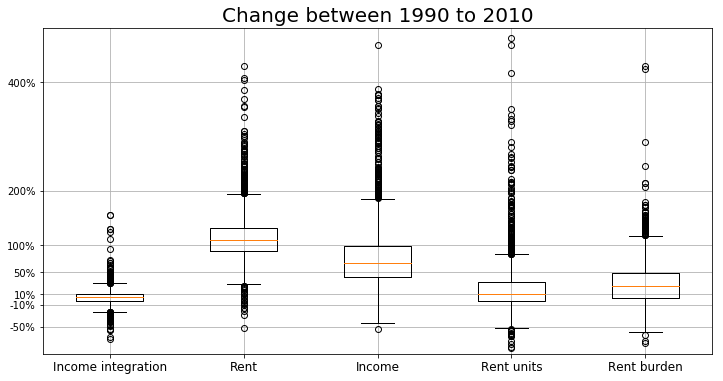

In [49]:
num = range(df_change.shape[1])

plt.figure(figsize = (12, 6))
plt.boxplot([df_change.iloc[:,i] for i in num])
plt.ylim(-1,5)
plt.xticks([i+1 for i in num], 
           ('Income integration', 'Rent', 'Income', 'Rent units', 'Rent burden'),
          fontsize = 12)
plt.title('Change between 1990 to 2010', fontsize = 20)
plt.yticks((-0.5,-0.1,0.1,0.5,1,2,4), ('-50%', '-10%', '10%', '50%', '100%', '200%', '400%'))
plt.grid()
plt.show()

In [50]:
df_change1 = pd.DataFrame()
df_change1['entropy_9_0'] = df_census.entropy_index_0 / df_census.entropy_index_9 -1
df_change1['rent_9_0'] = df_census.rent_0 / df_census.rent_9 -1
df_change1['inc_9_0'] = df_census.inc_0 / df_census.inc_9 -1
df_change1['rent_units_9_0'] = df_census.r_units_0 / df_census.r_units_9 -1
df_change1['rent_burden_9_0'] = df_census.ratio_rent_inc_0 / df_census.ratio_rent_inc_9 -1

In [51]:
df_change2 = pd.DataFrame()
df_change2['entropy_0_1'] = df_census.entropy_index_1 / df_census.entropy_index_0 -1
df_change2['rent_0_1'] = df_census.rent_1 / df_census.rent_0 -1
df_change2['inc_0_1'] = df_census.inc_1 / df_census.inc_0 -1
df_change2['rent_units_0_1'] = df_census.r_units_1 / df_census.r_units_0 -1
df_change2['rent_burden_0_1'] = df_census.ratio_rent_inc_1 / df_census.ratio_rent_inc_0 -1

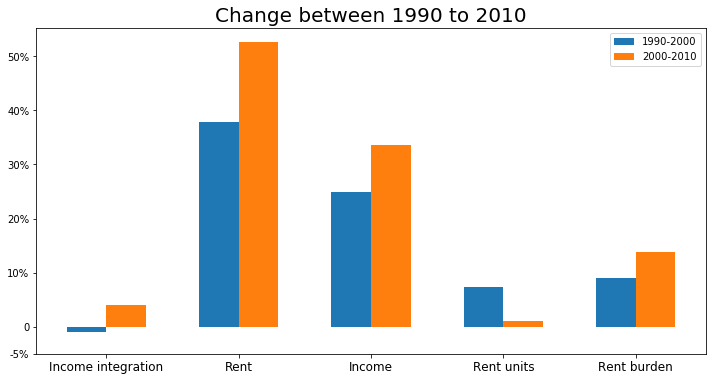

In [52]:
plt.figure(figsize = (12, 6))
plt.bar([i-0.15 for i in num], [df_change1.iloc[:,i].median() for i in num], 
        width = 0.3, label = '1990-2000')
plt.bar([i+0.15 for i in num], [df_change2.iloc[:,i].median() for i in num], 
        width = 0.3, label = '2000-2010')
plt.xticks([i for i in num], 
           ('Income integration', 'Rent', 'Income', 'Rent units', 'Rent burden'),
          fontsize = 12)
plt.yticks((-0.05,0, 0.1,0.2,0.3, 0.4,0.5), ('-5%', '0', '10%', '20%', '30%','40%','50%'))
plt.title('Change between 1990 to 2010', fontsize = 20)
plt.legend()

# 3. Analysis for rent growth

In [53]:
columns = ['inc', 'rent', 'entropy', 'units', 
           'inc_change', 'entropy_change','units_change', 'rent_change']

In [54]:
train = pd.concat([df_census.inc_9, df_census.rent_9, df_census.entropy_index_9, 
                   df_census.r_units_9,
                  df_change1.inc_9_0, df_change1.entropy_9_0, df_change1.rent_units_9_0,
                  df_change1.rent_9_0], axis = 1)
train.columns = columns

In [55]:
test = pd.concat([df_census.inc_0, df_census.rent_0, df_census.entropy_index_0, 
                   df_census.r_units_0,
                  df_change2.inc_0_1, df_change2.entropy_0_1, df_change2.rent_units_0_1,
                  df_change2.rent_0_1], axis = 1)
test.columns = columns

In [56]:
train.describe()

,inc,rent,entropy,units,inc_change,entropy_change,units_change,rent_change
count,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000
mean,37733.340876,543.203659,0.813956,962.096774,0.307354,-0.001731,0.152253,0.394267
std,18724.271851,148.592375,0.123108,899.818493,0.381466,0.148583,0.418321,0.240902
min,4999.000000,171.000000,0.194083,4.000000,-0.342272,-0.629720,-0.701754,-0.375714
25%,25089.000000,453.000000,0.755000,357.000000,0.100910,-0.065349,-0.011488,0.272727
50%,36221.000000,531.000000,0.848471,718.000000,0.248516,-0.009195,0.072967,0.378582
75%,46843.000000,628.000000,0.904543,1269.000000,0.421762,0.049325,0.208973,0.485149
max,150001.000000,1001.000000,0.982500,8997.000000,7.984771,2.314745,8.060976,3.547727


In [57]:
test.describe()

,inc,rent,entropy,units,inc_change,entropy_change,units_change,rent_change
count,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000
mean,48685.029851,751.435243,0.807262,1008.557535,0.385157,0.049128,0.124023,0.550668
std,28336.768464,226.933084,0.131038,870.506315,0.360590,0.154067,2.159801,0.263856
min,9893.000000,195.000000,0.183020,9.000000,-0.789146,-0.731448,-0.855769,-0.673401
25%,30720.000000,644.000000,0.756307,412.000000,0.156717,-0.026818,-0.068332,0.412884
50%,42483.000000,740.000000,0.846033,788.000000,0.336591,0.039649,0.011448,0.526224
75%,58833.000000,833.000000,0.896749,1321.000000,0.545560,0.108568,0.125589,0.655589
max,200001.000000,2001.000000,0.980721,8900.000000,3.219719,1.477321,96.619048,3.600000


In [58]:
# per ten thousand dollars income
train.inc = train.inc/10000
test.inc = test.inc/10000

# per one thousand dollar rent
train.rent = train.rent/1000
test.rent = test.rent/1000

# per one thousand renter-occupied units
train.units = train.units/1000
test.units = test.units/1000

In [59]:
train.shape, test.shape

((2077, 8), (2077, 8))

In [60]:
train.describe()

,inc,rent,entropy,units,inc_change,entropy_change,units_change,rent_change
count,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000
mean,3.773334,0.543204,0.813956,0.962097,0.307354,-0.001731,0.152253,0.394267
std,1.872427,0.148592,0.123108,0.899818,0.381466,0.148583,0.418321,0.240902
min,0.499900,0.171000,0.194083,0.004000,-0.342272,-0.629720,-0.701754,-0.375714
25%,2.508900,0.453000,0.755000,0.357000,0.100910,-0.065349,-0.011488,0.272727
50%,3.622100,0.531000,0.848471,0.718000,0.248516,-0.009195,0.072967,0.378582
75%,4.684300,0.628000,0.904543,1.269000,0.421762,0.049325,0.208973,0.485149
max,15.000100,1.001000,0.982500,8.997000,7.984771,2.314745,8.060976,3.547727


In [61]:
test.describe()

,inc,rent,entropy,units,inc_change,entropy_change,units_change,rent_change
count,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000
mean,4.868503,0.751435,0.807262,1.008558,0.385157,0.049128,0.124023,0.550668
std,2.833677,0.226933,0.131038,0.870506,0.360590,0.154067,2.159801,0.263856
min,0.989300,0.195000,0.183020,0.009000,-0.789146,-0.731448,-0.855769,-0.673401
25%,3.072000,0.644000,0.756307,0.412000,0.156717,-0.026818,-0.068332,0.412884
50%,4.248300,0.740000,0.846033,0.788000,0.336591,0.039649,0.011448,0.526224
75%,5.883300,0.833000,0.896749,1.321000,0.545560,0.108568,0.125589,0.655589
max,20.000100,2.001000,0.980721,8.900000,3.219719,1.477321,96.619048,3.600000


In [62]:
## drop outliers of change
def outlier(x):
    outlier = np.mean(x) + 2 * np.std(x)
    return outlier
a = np.ones(train.shape[0])
for i in range(train.shape[1]):
    a0 = train.iloc[:,i] < outlier(train.iloc[:,i])
    a = a0 * a
    
b = np.ones(test.shape[0])
for i in range(test.shape[1]):
    b0 = test.iloc[:,i] < outlier(test.iloc[:,i])
    b = b0 * b
    
#train_new = train[[bool(i) for i in a]]
#test_new = test[[bool(i) for i in b]]
#train_new.shape, test_new.shape

In [63]:
model = smf.ols('rent_change ~ inc  + rent + entropy + units +\
                inc_change + entropy_change + units_change',train).fit()

In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_change   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     117.4
Date:                Wed, 29 Nov 2017   Prob (F-statistic):          2.31e-145
Time:                        11:20:02   Log-Likelihood:                 357.09
No. Observations:                2077   AIC:                            -698.2
Df Residuals:                    2069   BIC:                            -653.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.3092      0.051      6.123      0.000         0.210     0.408
inc                0.0768      0.004     17.262      0.000         0.068     0.086
rent              -0.9375      0.048    -19.343      0.000        -1.033    -0.842
entropy            0.2346      0.050      4.649      0.000         0.136     0.334
units              0.0294      0.005      5.484      0.000         0.019     0.040
inc_change         0.2424      0.013     18.545      0.000         0.217     0.268
entropy_change    -0.0202      0.038     -0.539      0.590        -0.094     0.053
units_change       0.0696      0.012      6.013      0.000         0.047     0.092
==============================================================================
Omnibus:                     1116.152   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33490.642
Skew:                           1.952   Prob(JB):                         0.00
Kurtosis:                      22.281   Cond. No.                         73.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multi-linear regression results explanation:
- the P of F-statistic < 0.001, this model is statisticly effective
- The change of entropy index is not significantly related to rent growth
- Negative value of coef of rent and entropy_change, means that higher rent or getting integrated, will lead to lower rent growth

## Test the model

In [65]:
train.head()

,inc,rent,entropy,units,inc_change,entropy_change,units_change,rent_change
0,3.8711,0.742,0.867149,0.384,0.312728,-0.010583,0.096354,-0.016173
1,4.0484,0.535,0.919819,0.214,0.013215,0.003783,1.271028,0.201869
2,2.4732,0.466,0.908063,1.462,0.217208,0.019616,0.037620,0.197425
3,2.4823,0.422,0.652853,0.357,-0.046409,0.271585,-0.058824,0.092417
4,1.8762,0.298,0.814774,2.570,0.049675,-0.043021,0.012062,-0.107383


In [66]:
test.head()

,inc,rent,entropy,units,inc_change,entropy_change,units_change,rent_change
0,5.0817,0.730,0.857971,0.421,0.148592,0.074021,0.508314,0.743836
1,4.1019,0.643,0.923299,0.486,0.783271,0.021563,0.265432,1.068429
2,3.0104,0.558,0.925875,1.517,0.114636,-0.068188,0.065920,0.474910
3,2.3671,0.461,0.830158,0.336,0.076803,-0.190016,0.502976,0.887202
4,1.9694,0.266,0.779722,2.601,0.564791,0.031258,0.006536,0.710526


In [67]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [68]:
def modelEval(lm, key = 'Y'):
    lmy = lm.predict(test)
    y_err = lmy - test[key]
    y_norm = test[key]-np.mean(test[key])
    return 1-y_err.dot(y_err)/y_norm.dot(y_norm)


In [69]:
R_2_IS_OLS = model.rsquared
R_2_OS_OLS = modelEval(model, key = 'rent_change')
R_2_IS_OLS, R_2_OS_OLS

(0.28431698439069941, -0.99592650077288303)

In [70]:
### or :
#error = model.predict(X_test) - y_test
#R_2_OS_OLS=1-np.var(error)/np.var(y_test)
#R_2_IS_OLS, R_2_OS_OLS

### R2 could not be less than 0. something wrong ????

## Use Ridge to solve this problem!!

In [71]:
from sklearn import linear_model
Ridge=linear_model.Ridge(fit_intercept=True, alpha=10) #try Ridge with an arbitrary regularization parameter lambda=1

Ridge.fit(X_train, y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

#Out of sample
p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared we found for IS Ridge is: 0.26560897574798614
The R-squared we found for OS Ridge is: 0.03756265103208356


In [72]:

#Find the Alpha and report best test performance for Ridge/Lasso.
def Regularization_fit_lambda(model,X_train,y_train,lambdas,p=0.4,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #lambdas: a list of lambda values to try
    #p: ratio of the validation sample size / total training size
    #Graph: plot the graph of R^2 values for different lambda

    R_2_OS=[]
    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_lambda = lambdas[0]
    
    for i in lambdas:
        lm = RM(i)
        lm.fit(X_train,y_train)  #fit the regularization model
        y_predict=lm.predict(X_test) #compute the prediction for the validation sample 
        err_OS=y_predict-y_test
        R_2_OS_=1-np.var(err_OS)/np.var(y_test)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2:
            best_R2 = R_2_OS_
            best_lambda = i
    
    if Graph==True:
        plt.title('IS R-squared vs OS-R-squared for different Lambda')
        if logl:
            plt.xlabel('ln(Lambda)')
            l=log(lambdas)
            bl=log(best_lambda)
        else:
            plt.xlabel('Lambda')
            l=lambdas
            bl=best_lambda
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return best_lambda

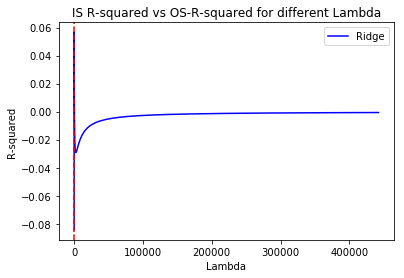

Optimal lambda for Ridge=25.30889155605328


In [73]:
#select best lambda for Ridge
lambdas = np.exp(np.linspace(-5,13,200))
lambda_r_optimal=Regularization_fit_lambda(1,X_train,y_train,lambdas,p=0.4,Graph=True)
print('Optimal lambda for Ridge={0}'.format(lambda_r_optimal))

In [74]:
Ridge = linear_model.Ridge(fit_intercept=True,alpha=lambda_r_optimal)

Ridge.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_
#Out of sample
p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared we found for IS Ridge is: 0.23646073032401227
The R-squared we found for OS Ridge is: 0.056656387339021674


## R-squared for OS Ridge is much better!!

In [75]:
Ridge_coef

array([ 0.03808164, -0.37590062,  0.03021327,  0.03912342,  0.19710399,
       -0.03750429,  0.04167253])

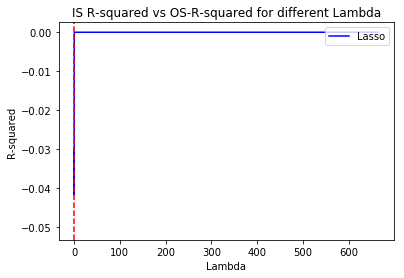

Optimal lambda for Lasso=0.045367248900406006


In [76]:
#select lambdas for Lasso 
lambdas=np.exp(np.linspace(-5,6.5,200))
lambda_l_optimal=Regularization_fit_lambda(2,X_train,y_train,lambdas,p=0.4,Graph=True)
print('Optimal lambda for Lasso={0}'.format(lambda_l_optimal))

In [77]:
Lasso=linear_model.Lasso(fit_intercept=True,alpha=lambda_l_optimal)
#try Ridge with a selected regularization parameter lambda

Lasso.fit(X_train,y_train)
# In the sample:
p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Ridge))

Lasso_coef=Lasso.coef_
#Out of sample
p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for IS Lasso is: 0.23646073032401227
The R-squared we found for OS Lasso is: -4.440892098500626e-16


In [78]:
Lasso_coef

array([ 0., -0., -0.,  0.,  0., -0.,  0.])

##  Lasso is not good……

In [79]:
OLS_coef=model.params
OLS_coef

Intercept         0.309240
inc               0.076813
rent             -0.937455
entropy           0.234611
units             0.029415
inc_change        0.242432
entropy_change   -0.020225
units_change      0.069642
dtype: float64

In [80]:
list(OLS_coef.index)

['Intercept',
 'inc',
 'rent',
 'entropy',
 'units',
 'inc_change',
 'entropy_change',
 'units_change']

In [81]:
OLS_coef[1:]

inc               0.076813
rent             -0.937455
entropy           0.234611
units             0.029415
inc_change        0.242432
entropy_change   -0.020225
units_change      0.069642
dtype: float64

In [82]:
#let's look at the final coefficients
name=list(OLS_coef.index)[1:] # Generate name of rows/variables

result=[name, np.ndarray.tolist(np.asarray(OLS_coef[1:])),
        np.ndarray.tolist(Ridge_coef),
        np.ndarray.tolist(Lasso_coef)] # put all the estimations of different models together(it is same for OS and IS)
temp=pd.DataFrame(result).T
R2_IS=pd.DataFrame(['R2_IS',R_2_IS_OLS, R_2_IS_Ridge,R_2_IS_Lasso]).T # paste the In sample R2 in the end of temp
R2_OS=pd.DataFrame(['R2_OS',R_2_OS_OLS, R_2_OS_Ridge,R_2_OS_Lasso]).T # paste the Out of sample R2 in the end of temp

temp=temp.append(R2_IS)
result=temp.append(R2_OS)
result.columns=['','OLS','Ridge','Lasso'] # Change the column name
result.set_index('')

,OLS,Ridge,Lasso
,,,
inc,0.0768133,0.0380816,0
rent,-0.937455,-0.375901,-0
entropy,0.234611,0.0302133,-0
units,0.0294146,0.0391234,0
inc_change,0.242432,0.197104,0
entropy_change,-0.0202254,-0.0375043,-0
units_change,0.0696418,0.0416725,0
R2_IS,0.284317,0.236461,-2.22045e-16
R2_OS,-0.995927,0.0566564,-4.44089e-16
